In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import pycountry
import plotly.express as px

In [3]:
df=pd.read_csv("universal_top_spotify_songs.csv")

Data Cleaning

In [4]:
df.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,1,0,0,NaN,2024-01-13,100,True,...,6,-3.180,0,0.0319,0.2560,0.000000,0.1140,0.844,111.018,1
1,0R6NfOiLzLj4O5VbYSJAjf,La Diabla,Xavi,2,0,1,NaN,2024-01-13,97,False,...,11,-4.372,0,0.0409,0.2550,0.000000,0.2360,0.697,131.842,3
2,4xhsWYTOGcal8zt0J161CU,Lovin On Me,Jack Harlow,3,0,-1,NaN,2024-01-13,99,True,...,2,-4.911,1,0.0568,0.0026,0.000002,0.0937,0.606,104.983,4
3,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,4,0,0,NaN,2024-01-13,99,False,...,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,4
4,3vkCueOmm7xQDoJ17W1Pm3,My Love Mine All Mine,Mitski,5,0,0,NaN,2024-01-13,99,False,...,9,-14.958,1,0.0321,0.8680,0.135000,0.1580,0.121,113.950,4


In [5]:
#check missing values
df.isnull().sum()

spotify_id               0
name                    22
artists                 22
daily_rank               0
daily_movement           0
weekly_movement          0
country               4356
snapshot_date            0
popularity               0
is_explicit              0
duration_ms              0
album_name             185
album_release_date     185
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
dtype: int64

In [6]:
# change the missing row in country with global 
df["country"] = df["country"].fillna("Global")
df["country"]

0         Global
1         Global
2         Global
3         Global
4         Global
           ...  
320670        AE
320671        AE
320672        AE
320673        AE
320674        AE
Name: country, Length: 320675, dtype: object

In [7]:
# drop the row with missing values
df = df.dropna()

In [8]:
df.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,1,0,0,Global,2024-01-13,100,True,...,6,-3.180,0,0.0319,0.2560,0.000000,0.1140,0.844,111.018,1
1,0R6NfOiLzLj4O5VbYSJAjf,La Diabla,Xavi,2,0,1,Global,2024-01-13,97,False,...,11,-4.372,0,0.0409,0.2550,0.000000,0.2360,0.697,131.842,3
2,4xhsWYTOGcal8zt0J161CU,Lovin On Me,Jack Harlow,3,0,-1,Global,2024-01-13,99,True,...,2,-4.911,1,0.0568,0.0026,0.000002,0.0937,0.606,104.983,4
3,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,4,0,0,Global,2024-01-13,99,False,...,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,4
4,3vkCueOmm7xQDoJ17W1Pm3,My Love Mine All Mine,Mitski,5,0,0,Global,2024-01-13,99,False,...,9,-14.958,1,0.0321,0.8680,0.135000,0.1580,0.121,113.950,4


Exploratory Data Analysis

In [9]:
df["country"].tail(50)

320625    AE
320626    AE
320627    AE
320628    AE
320629    AE
320630    AE
320631    AE
320632    AE
320633    AE
320634    AE
320635    AE
320636    AE
320637    AE
320638    AE
320639    AE
320640    AE
320641    AE
320642    AE
320643    AE
320644    AE
320645    AE
320646    AE
320647    AE
320648    AE
320649    AE
320650    AE
320651    AE
320652    AE
320653    AE
320654    AE
320655    AE
320656    AE
320657    AE
320658    AE
320659    AE
320660    AE
320661    AE
320662    AE
320663    AE
320664    AE
320665    AE
320666    AE
320667    AE
320668    AE
320669    AE
320670    AE
320671    AE
320672    AE
320673    AE
320674    AE
Name: country, dtype: object

In [10]:
# name of the country
countries_name = []
for el in df["country"]:
    country_info = pycountry.countries.get(alpha_2=el)
    if country_info:
        countries_name.append(country_info.name)
    else:
        # Handle the case when the country is not found (e.g., print a message or use a default name)
        countries_name.append("Unknown")
df["countries_name"] = countries_name
# print the data 
df["countries_name"]

0                      Unknown
1                      Unknown
2                      Unknown
3                      Unknown
4                      Unknown
                  ...         
320670    United Arab Emirates
320671    United Arab Emirates
320672    United Arab Emirates
320673    United Arab Emirates
320674    United Arab Emirates
Name: countries_name, Length: 320490, dtype: object

In [11]:
df['countries_name'].value_counts()

countries_name
Latvia                4414
Sweden                4409
Slovakia              4408
Denmark               4407
Dominican Republic    4407
                      ... 
Hong Kong             4354
Unknown               4353
Canada                4329
United States         4321
Luxembourg            4044
Name: count, Length: 73, dtype: int64

In [12]:
df_GR=df[df['countries_name']=='Greece']
df_GR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4404 entries, 2350 to 319424
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   spotify_id          4404 non-null   object 
 1   name                4404 non-null   object 
 2   artists             4404 non-null   object 
 3   daily_rank          4404 non-null   int64  
 4   daily_movement      4404 non-null   int64  
 5   weekly_movement     4404 non-null   int64  
 6   country             4404 non-null   object 
 7   snapshot_date       4404 non-null   object 
 8   popularity          4404 non-null   int64  
 9   is_explicit         4404 non-null   bool   
 10  duration_ms         4404 non-null   int64  
 11  album_name          4404 non-null   object 
 12  album_release_date  4404 non-null   object 
 13  danceability        4404 non-null   float64
 14  energy              4404 non-null   float64
 15  key                 4404 non-null   int64  
 16  loudne

In [13]:
df_GR["snapshot_date"]=pd.to_datetime(df["snapshot_date"])
# Extract the month and year and create new columns
df_GR["month"] = df_GR["snapshot_date"].dt.month
df_GR["month"]
df_GR["year"] = df_GR["snapshot_date"].dt.year
df_GR["year"]

C:\Users\mgasp\AppData\Local\Temp\ipykernel_5996\4025911359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GR["snapshot_date"]=pd.to_datetime(df["snapshot_date"])
C:\Users\mgasp\AppData\Local\Temp\ipykernel_5996\4025911359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GR["month"] = df_GR["snapshot_date"].dt.month
C:\Users\mgasp\AppData\Local\Temp\ipykernel_5996\4025911359.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

2350      2024
2351      2024
2352      2024
2353      2024
2354      2024
          ... 
319420    2023
319421    2023
319422    2023
319423    2023
319424    2023
Name: year, Length: 4404, dtype: int32

In [14]:
df_GR

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,countries_name,month,year
2350,4Fke1kIQz7pzIZYKqyzeNm,Allou,"TOQUEL, LILA, Beyond",1,0,0,GR,2024-01-13,74,True,...,0.1020,0.4140,0.000000,0.0763,0.456,130.762,5,Greece,1,2024
2351,465fe0UfQPTxl1xK3judQQ,OAED,"SNIK, Ivan Greko, BeTaf Beats",2,0,0,GR,2024-01-13,73,True,...,0.0601,0.1440,0.000000,0.1420,0.294,157.023,4,Greece,1,2024
2352,0DRBuH0O3Uh6YqJWMAjHLl,OAED - Remix,"SNIK, TOQUEL, Voyage, Ivan Greko, BeTaf Beats",3,47,47,GR,2024-01-13,0,True,...,0.0428,0.1380,0.000000,0.1010,0.281,156.989,4,Greece,1,2024
2353,3CdFVH8SOVnvT0sJLT198p,ISOS,Sicario,4,-1,0,GR,2024-01-13,68,False,...,0.0508,0.0957,0.000000,0.1320,0.302,99.865,4,Greece,1,2024
2354,5d2ETO2YDunJTXd5yuCCRA,3:15,TOQUEL,5,-1,-2,GR,2024-01-13,72,True,...,0.0791,0.0848,0.000063,0.0997,0.273,92.529,4,Greece,1,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319420,2YSzYUF3jWqb9YP9VXmpjE,IDGAF (feat. Yeat),"Drake, Yeat",46,4,0,GR,2023-10-18,92,True,...,0.2710,0.0464,0.000089,0.2050,0.138,136.952,4,Greece,10,2023
319421,09u3uU5KzkdsoUTDeBF10J,An Apopse Figo,Bloody Hawk,47,3,0,GR,2023-10-18,60,True,...,0.3450,0.5350,0.000000,0.1820,0.694,140.040,4,Greece,10,2023
319422,0TsD4iSubzoyfG0RcfWIHR,MAYA,"Sigma, SIDARTA",48,2,0,GR,2023-10-18,61,False,...,0.0598,0.0710,0.001140,0.1870,0.415,123.974,4,Greece,10,2023
319423,36eKhbZ5KaCBuBX2IL9ujN,CASTELLANO,"Dani Gambino, Dj The Boy",49,1,0,GR,2023-10-18,62,True,...,0.1480,0.2530,0.000000,0.2250,0.685,146.926,4,Greece,10,2023


In [15]:
df_GR['snapshot_date'].head()

2350   2024-01-13
2351   2024-01-13
2352   2024-01-13
2353   2024-01-13
2354   2024-01-13
Name: snapshot_date, dtype: datetime64[ns]

In [16]:
df_GR.groupby(['artists','name'])['popularity'].mean().sort_values(ascending=True)

artists                                        name                                       
Taylor Swift                                   "Slut!" (Taylor's Version) (From The Vault)     0.000000
SNIK, TOQUEL, Voyage, Ivan Greko, BeTaf Beats  OAED - Remix                                    0.000000
Taylor Swift                                   Style (Taylor's Version)                        0.000000
Immune, Misk                                   ΟΡΓΗ                                           26.000000
Ivan Greko, BeTaf Beats                        HATER                                          27.000000
                                                                                                ...    
Brenda Lee                                     Rockin' Around The Christmas Tree              96.214286
Mariah Carey                                   All I Want for Christmas Is You                97.769231
iñigo quintero                                 Si No Estás                   

In [17]:
top10=df_GR.groupby(['artists','name'],as_index=False)['popularity'].mean().sort_values(by='popularity',ascending=False).head(10)
top10


,artists,name,popularity
122,Tate McRae,greedy,99.222222
48,Kenya Grace,Strangers,97.894737
142,iñigo quintero,Si No Estás,97.863636
70,Mariah Carey,All I Want for Christmas Is You,97.769231
13,Brenda Lee,Rockin' Around The Christmas Tree,96.214286
6,Ariana Grande,Santa Tell Me,96.000000
19,Dean Martin,Let It Snow! Let It Snow! Let It Snow!,95.000000
24,"Drake, Yeat",IDGAF (feat. Yeat),92.000000
9,Bobby Helms,Jingle Bell Rock,91.000000
23,Doja Cat,Paint The Town Red,88.076923


In [18]:
#create a new column containin the artist & the name
top10['artist&name']=top10['artists'].astype(str) + '-' + top10['name']
top10['artist&name']

122                                    Tate McRae-greedy
48                                 Kenya Grace-Strangers
142                           iñigo quintero-Si No Estás
70          Mariah Carey-All I Want for Christmas Is You
13          Brenda Lee-Rockin' Around The Christmas Tree
6                            Ariana Grande-Santa Tell Me
19     Dean Martin-Let It Snow! Let It Snow! Let It S...
24                        Drake, Yeat-IDGAF (feat. Yeat)
9                           Bobby Helms-Jingle Bell Rock
23                           Doja Cat-Paint The Town Red
Name: artist&name, dtype: object

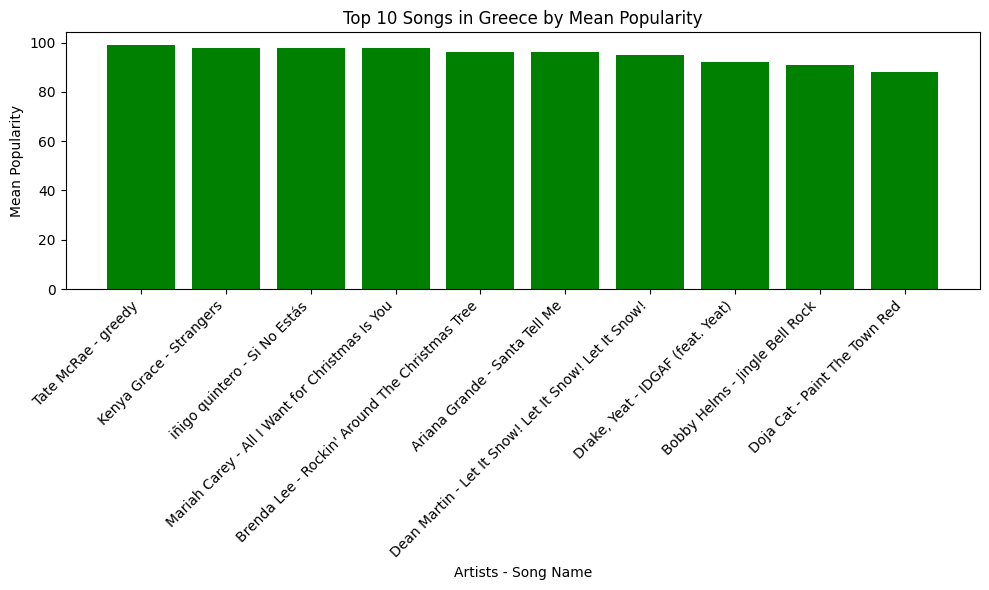

In [19]:
# Top 10
plt.figure(figsize=(10, 6))
plt.bar(range(len(top10)), top10['popularity'], color='green')
plt.title('Top 10 Songs in Greece by Mean Popularity')
plt.xlabel('Artists - Song Name')
plt.ylabel('Mean Popularity')
plt.xticks(range(len(top10)), [f"{artist} - {song}" for artist, song in zip(top10['artists'], top10['name'])], rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
# song with the highest number appearances in top10
most_topchart=df_GR[["artists", "name", "daily_rank"]].value_counts().reset_index().sort_values(by=["daily_rank", "count"], ascending=[True, False])
most_top=most_topchart.groupby(["daily_rank"],as_index=False).nth[:1]#.head(5)

In [21]:
most_top10=most_topchart.groupby(["daily_rank"],as_index=False).nth[:1].head(10)
most_in_top10=most_top10.groupby(['artists','name'],as_index=False)['count'].sum()
most_in_top10

,artists,name,count
0,"Kidd, Oge",NA PAS,44
1,"RACK, MENJU, Oge",VENDETTA,18
2,"SNIK, Ivan Greko, BeTaf Beats",OAED,42
3,TOQUEL,3:15,37
4,"TOQUEL, FLY LO, Beyond",Ghetto,29
5,"TOQUEL, LILA, Beyond",Allou,32


Kidd, Oge with song "NA PAS" become the song with the most appearance in daily rank 6 to 8

In [66]:
# artist with the highest number appearances in top10
most_appearance_artist=most_in_top10[most_in_top10["artists"].str.contains('TOQUEL')]
most_appearance_artist['count'].sum()

98

Artist name "TOQUEL" is the artist with the highest number of appearance in top10 for 2023

In [22]:
#Group by 'artists', 'song_name', calculate mean popularity, and sort within each group for October
df_month_10 = df_GR[df_GR['month'] == 10]
df_top_songs_month_10 = df_month_10.groupby(['artists', 'name'])['popularity'].mean().reset_index()
df_top_songs_month_10 = df_month_10.sort_values(by='popularity', ascending=False).head(10)
df_top_songs_month_10_as_dataframe = pd.DataFrame(df_top_songs_month_10)
df_top_songs_month_10_as_dataframe

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,countries_name,month,year
282877,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,26,-2,1,GR,2023-10-28,99,True,...,0.0319,0.256,0.00000,0.114,0.844,111.018,1,Greece,10,2023
275586,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,34,-3,-5,GR,2023-10-30,99,True,...,0.0319,0.256,0.00000,0.114,0.844,111.018,1,Greece,10,2023
286606,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,24,-1,3,GR,2023-10-27,99,True,...,0.0319,0.256,0.00000,0.114,0.844,111.018,1,Greece,10,2023
279233,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,31,-5,-4,GR,2023-10-29,99,True,...,0.0319,0.256,0.00000,0.114,0.844,111.018,1,Greece,10,2023
271935,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,33,1,-4,GR,2023-10-31,99,True,...,0.0319,0.256,0.00000,0.114,0.844,111.018,1,Greece,10,2023
290284,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,23,0,6,GR,2023-10-26,99,True,...,0.0319,0.256,0.00000,0.114,0.844,111.018,1,Greece,10,2023
301184,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,29,-2,21,GR,2023-10-23,98,True,...,0.0319,0.256,0.00000,0.114,0.844,111.018,1,Greece,10,2023
304845,5mjYQaktjmjcMKcUIcqz4s,Strangers,Kenya Grace,40,-4,10,GR,2023-10-22,98,False,...,0.0946,0.701,0.00274,0.219,0.416,169.982,4,Greece,10,2023
297569,5mjYQaktjmjcMKcUIcqz4s,Strangers,Kenya Grace,41,0,9,GR,2023-10-24,98,False,...,0.0946,0.701,0.00274,0.219,0.416,169.982,4,Greece,10,2023
319403,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,29,21,0,GR,2023-10-18,98,True,...,0.0319,0.256,0.00000,0.114,0.844,111.018,1,Greece,10,2023


In [41]:
fig1a=px.bar(df_top_songs_month_10_as_dataframe,x='name',y='popularity',title="Top10 songs based on popularity for month October")
fig1a

Analysis

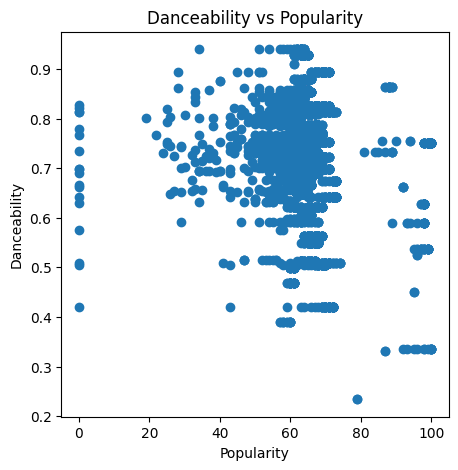

In [24]:
# correlation between song popularity and its danceability 
plt.figure(figsize=(5, 5))
plt.scatter(data=df_GR ,x="popularity", y="danceability")
plt.ylabel("Danceability")
plt.xlabel("Popularity")
plt.title("Danceability vs Popularity")
plt.show()

Some data points show there is linear relationship between two variables. To confirm this we can take pearson r correlation

In [25]:
# Calculate correlation coefficient
correlation_coefficient = df_GR['popularity'].corr(df_GR['danceability'])
correlation_coefficient

-0.13178469202026796

the data have negative correlation: songs with higher popularity seem to have slightly lower danceability

In [26]:
fig1=px.bar(top10,x='artist&name',y='popularity',color='popularity')
fig1

In [27]:
fig2=px.bar(most_in_top10,x='artists',y='count')
fig2

In [28]:
fig3=px.scatter(df_GR, x= 'popularity', y= 'danceability',size='tempo',color='is_explicit',hover_data='loudness')
fig3

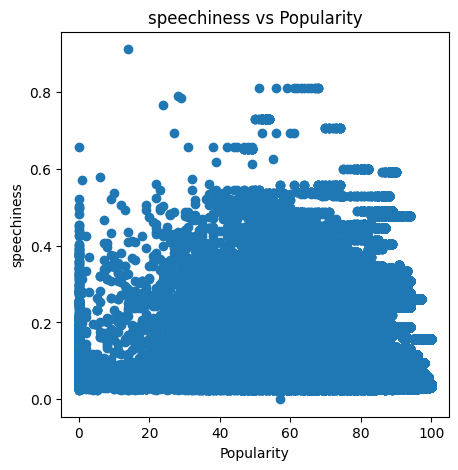

-0.10210712759843596

In [29]:
plt.figure(figsize=(5, 5))
plt.scatter(data=df ,x="popularity", y="speechiness")
plt.ylabel("speechiness")
plt.xlabel("Popularity")
plt.title("speechiness vs Popularity")
plt.show()
correlation_coefficient2 = df_GR['popularity'].corr(df_GR['speechiness'])
correlation_coefficient2

In [30]:
fig4=px.scatter(df_GR, x= 'popularity', y= 'speechiness',size='tempo',color='is_explicit',hover_data='loudness')
fig4

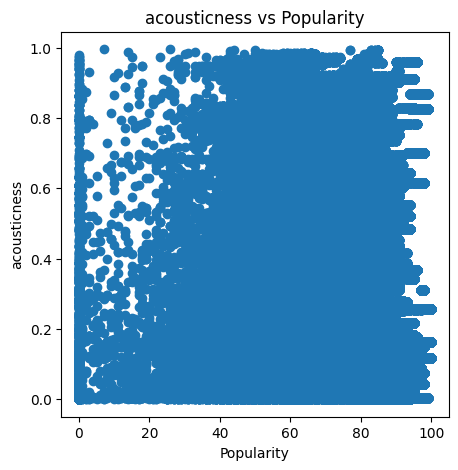

0.11761320459917878

In [31]:
#correlation between song popularity and its acousticness
plt.figure(figsize=(5, 5))
plt.scatter(data=df ,x="popularity", y="acousticness")
plt.ylabel("acousticness")
plt.xlabel("Popularity")
plt.title("acousticness vs Popularity")
plt.show()
correlation_coefficient3 = df_GR['popularity'].corr(df_GR['acousticness'])
correlation_coefficient3

In [32]:
fig5=px.scatter(df_GR, x= 'popularity', y= 'acousticness',size='tempo',color='is_explicit',hover_data='loudness')
fig5

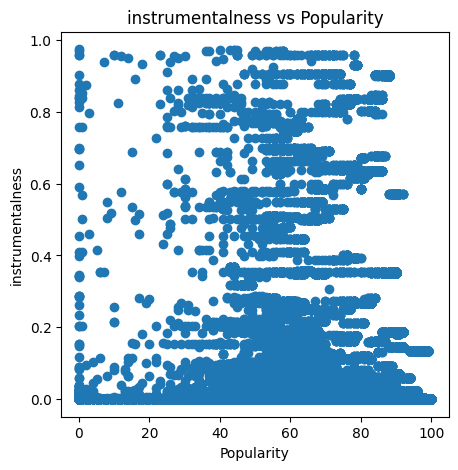

0.010122261774641336

In [33]:
#correlation between song popularity and its instrumentalness
plt.figure(figsize=(5, 5))
plt.scatter(data=df ,x="popularity", y="instrumentalness")
plt.ylabel("instrumentalness")
plt.xlabel("Popularity")
plt.title("instrumentalness vs Popularity")
plt.show()
correlation_coefficient4 = df_GR['popularity'].corr(df_GR['instrumentalness'])
correlation_coefficient4

In [34]:
fig6=px.scatter(df_GR, x= 'popularity', y= 'instrumentalness',size='tempo',color='is_explicit',hover_data='loudness')
fig6

Prepare a static Dashboard

In [35]:
from dash import Dash
from dash import html, dcc

In [36]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

In [37]:
app = Dash(external_stylesheets=external_stylesheets)
app.layout = html.Div([
    html.H1('Spotify Data from Greece 2023-2024'),
    dcc.Graph(id="plot1", figure = fig1),
    dcc.Graph(id="plot2", figure = fig1a),
    dcc.Graph(id="plot3", figure = fig2),
    dcc.Graph(id="plot4", figure = fig3),
    dcc.Graph(id="plot5", figure = fig4),
    dcc.Graph(id="plot6", figure = fig5),
    dcc.Graph(id="plot7", figure = fig6),
])

app.run(host='localhost', mode = 'inline', port= 8080, debug=True)

In [38]:
#Create a Dynamic Dashboard
#transform every unique date to a number
numdate= [x for x in range(len(df['snapshot_date'].unique()))]

dcc.Slider(min=numdate[0], #the first date
               max=numdate[-1], #the last date
               value=numdate[0], #default: the first
               marks = {numd: str(date) for numd,date in zip(numdate, df_GR['snapshot_date'].unique())}) 

Slider(min=0, max=87, marks={0: '2024-01-13 00:00:00', 1: '2024-01-12 00:00:00', 2: '2024-01-11 00:00:00', 3: '2024-01-10 00:00:00', 4: '2024-01-09 00:00:00', 5: '2024-01-08 00:00:00', 6: '2024-01-07 00:00:00', 7: '2024-01-06 00:00:00', 8: '2024-01-05 00:00:00', 9: '2024-01-04 00:00:00', 10: '2024-01-03 00:00:00', 11: '2024-01-02 00:00:00', 12: '2024-01-01 00:00:00', 13: '2023-12-31 00:00:00', 14: '2023-12-30 00:00:00', 15: '2023-12-29 00:00:00', 16: '2023-12-28 00:00:00', 17: '2023-12-27 00:00:00', 18: '2023-12-26 00:00:00', 19: '2023-12-25 00:00:00', 20: '2023-12-24 00:00:00', 21: '2023-12-23 00:00:00', 22: '2023-12-22 00:00:00', 23: '2023-12-21 00:00:00', 24: '2023-12-20 00:00:00', 25: '2023-12-19 00:00:00', 26: '2023-12-18 00:00:00', 27: '2023-12-17 00:00:00', 28: '2023-12-16 00:00:00', 29: '2023-12-15 00:00:00', 30: '2023-12-14 00:00:00', 31: '2023-12-13 00:00:00', 32: '2023-12-12 00:00:00', 33: '2023-12-11 00:00:00', 34: '2023-12-10 00:00:00', 35: '2023-12-09 00:00:00', 36: '2023

In [39]:
import numpy as np
# Convert 'year' column to integers
df_GR['year'] = df_GR['year'].astype(int)

C:\Users\mgasp\AppData\Local\Temp\ipykernel_5996\3745708937.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
# Extract unique years from the 'year' column
years_list = sorted(df['year'].unique())

KeyError: 'year'

In [ ]:
from dash.dependencies import Input, Output

In [ ]:
app = Dash(external_stylesheets=external_stylesheets)
app.layout = html.Div([
    html.H1('Spotify Data from Greece 2023-2024'),
    dcc.Graph(id="plot1", figure = fig1),
    dcc.Graph(id="plot2", figure = fig2),
    dcc.Graph(id="plot3", figure = fig3),
    dcc.Slider(min=numdate[0], #the first date
               max=numdate[-1], #the last date
               value=numdate[0], #default: the first
               marks = {numd: str(date) for numd,date in zip(numdate, df_GR['snapshot_date'].unique())}) 
])

@app.callback(Output('plot1', 'figure'),
              Input('slider1', 'value'))

def update_plot(x):
    print(f"Selected Year: {selected_year}")
    df_selected = df[df['year'] == x]
    
    fig1=px.bar(top10,x='artist&name',y='popularity',color='popularity')
    
    return fig1

app.run(host='localhost', mode = 'inline', port= 8080, debug=True)


app.run(host='localhost', mode = 'inline', port= 8080, debug=True)

AssertionError: The setup method 'errorhandler' can no longer be called on the application. It has already handled its first request, any changes will not be applied consistently.
Make sure all imports, decorators, functions, etc. needed to set up the application are done before running it.